### Data Dictionary 
- date time (object): Represents the date and time of the intrusion event in "MM/DD/YY HH:MM" format
- host (object): The identifier of the host system where the intrusion event occurred
- src (int64): A unique code representing the source of the data intrusion
- proto (object): The communication protocol used in the intrusion event, such as TCP or UDP
- type (float64): Additional information or categorization of the intrusion event
- spt (float64): The source port number used by the intruder
- dpt (float64): The destination port number on the host where the intrusion occurred
- srcstr (object): The source IP address of the intrusion
- cc (object): The country code representing the country of the source 
- country (object): The name of the country associated with the source address.
- locale (object): A more specific location within the country, such as a city or region.
- localeabbr (object): An abbreviation for the locale
- postalcode (object): The postal code or ZIP code for the source address.
- latitude (float64): The latitude coordinate for the source address.
- longitude (float64): The longitude coordinate for the source address.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../data/raw/AWS_Honeypot_marx-geo.csv")

#### Data Type Exploration
- Understanding more about our data using some statistical approaches and beginning to uncover errors or missing values that need to be addressed 

In [3]:
df.head(5)

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     451581 non-null  object 
 1   host         451581 non-null  object 
 2   src          451581 non-null  int64  
 3   proto        451581 non-null  object 
 4   type         44811 non-null   float64
 5   spt          406770 non-null  float64
 6   dpt          406770 non-null  float64
 7   srcstr       451581 non-null  object 
 8   cc           447985 non-null  object 
 9   country      447947 non-null  object 
 10  locale       342112 non-null  object 
 11  localeabbr   331705 non-null  object 
 12  postalcode   86478 non-null   object 
 13  latitude     448112 non-null  float64
 14  longitude    448153 non-null  float64
 15  Unnamed: 15  83 non-null      float64
dtypes: float64(6), int64(1), object(9)
memory usage: 55.1+ MB


In [5]:
df.describe()

,src,type,spt,dpt,latitude,longitude,Unnamed: 15
count,4.515810e+05,44811.000000,406770.000000,406770.000000,448112.000000,448153.000000,83.000000
mean,2.154902e+09,7.514896,18685.461494,6684.258212,36.214115,48.751751,-77.027536
std,1.081011e+09,1.799866,19290.141746,14032.839799,194.251441,91.774739,0.011942
min,1.677725e+07,0.000000,0.000000,0.000000,-43.533300,-175.000000,-77.059600
25%,1.169129e+09,8.000000,6000.000000,445.000000,30.666700,-4.000000,-77.036400
50%,2.031191e+09,8.000000,6000.000000,1433.000000,35.685000,106.000000,-77.036400
75%,3.164988e+09,8.000000,33461.000000,3389.000000,40.455500,118.777800,-77.014600
max,3.758094e+09,13.000000,65535.000000,65500.000000,20076.000000,178.416700,-77.014600


In [6]:
df.isnull().sum()

datetime            0
host                0
src                 0
proto               0
type           406770
spt             44811
dpt             44811
srcstr              0
cc               3596
country          3634
locale         109469
localeabbr     119876
postalcode     365103
latitude         3469
longitude        3428
Unnamed: 15    451498
dtype: int64

Missing values 
- Shape of dataset: 451581 rows × 16 columns
- Need to address missing values in following columns:
    - type           (406770) : Drop, too many missing values 
    - spt             (44811)
    - dpt             (44811)
    - cc               (3596)
    - country          (3634)
    - locale         (109469) 1/4th missing data for locale
    - localeabbr     (119876)
    - postalcode     (365103): Majority postal code missing - potential drop
    - latitude         (3469): Setting NA to zero?
    - longitude        (3428): Setting NA to zero? 

### Univariate Analysis

<Axes: xlabel='country'>

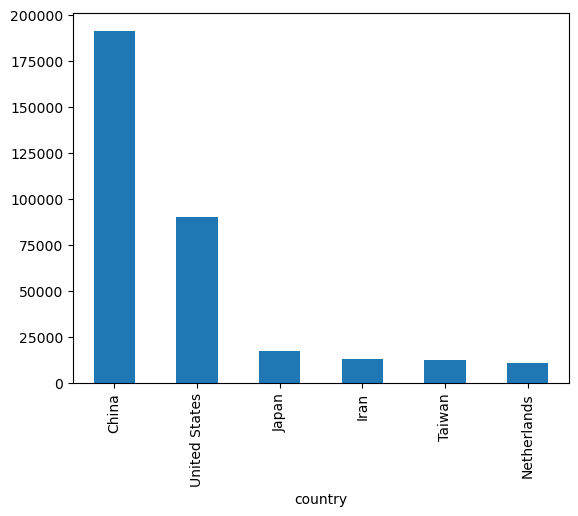

In [7]:
country_type_counts = df["country"].value_counts()
country_type_counts.nlargest(6).plot.bar()

Country Type Bar Graph Observations:
- The three countries with the most intrusion attempts are
    - China
    - United States 
    - Japan 

In [9]:
country_date = df.groupby(["country", "datetime"]).sum()

Observing dates of intrusions grouped by country 
- Sets up framework to allow us to view individual countries and their respective dates of intrusion attempts  

In [10]:
china_date = country_date.loc["China"]

<Axes: xlabel='locale'>

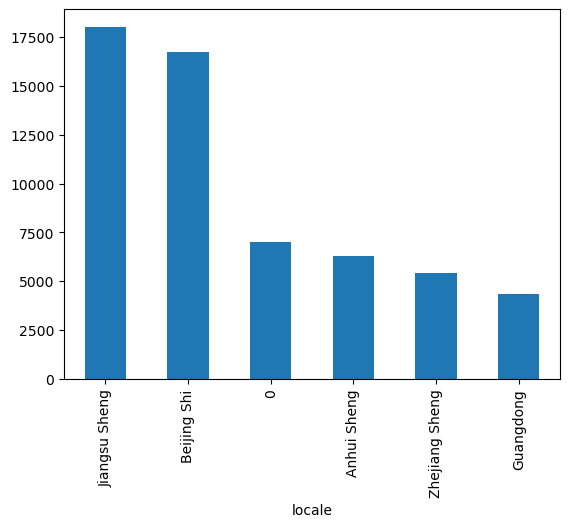

In [11]:
china_date_chart = china_date["locale"].value_counts()
china_date_chart.nlargest(6).plot.bar()

In [12]:
us_date = country_date.loc["United States"]

<Axes: xlabel='locale'>

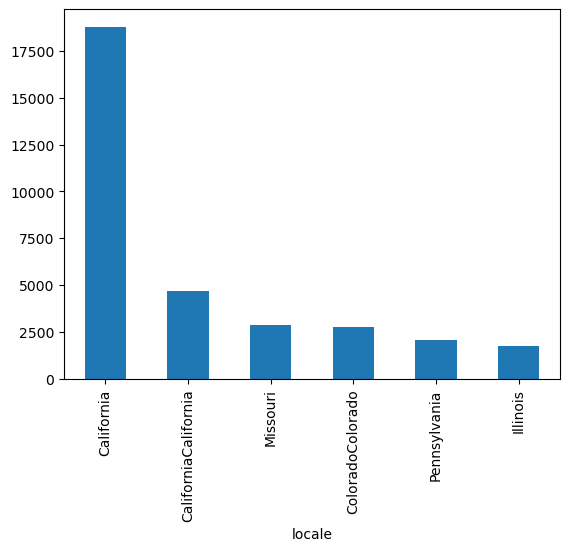

In [13]:
us_date_chart = us_date["locale"].value_counts()
us_date_chart.nlargest(6).plot.bar()

Potential error: Naming conventions are not standard, will need to address in wrangling 

In [18]:
df.groupby('spt')['cc'].count().sort_values(ascending = False)

spt
6000.0     154106
25416.0     18195
10100.0     11116
4445.0       4716
43825.0      2884
            ...  
6823.0          0
6821.0          0
8749.0          0
9865.0          0
64643.0         0
Name: cc, Length: 46188, dtype: int64

The Main source ports used for intrusion attempts:
- 6000.0     
- 25416.0     
- 10100.0     

### Date Time Exploration 
- This section will be looking at intrusion attempts by date and time 

In [20]:
#Resetting Index to Datetime
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

/var/folders/4s/dmr9y8dn2sqdy8fkqfmhmw0c0000gn/T/ipykernel_6703/87986853.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["datetime"])


In [22]:
#Reorganizing data to look at SPT one month at a time
OneMonth = df.resample("1M")["spt"].value_counts()

<Axes: ylabel='datetime,spt'>

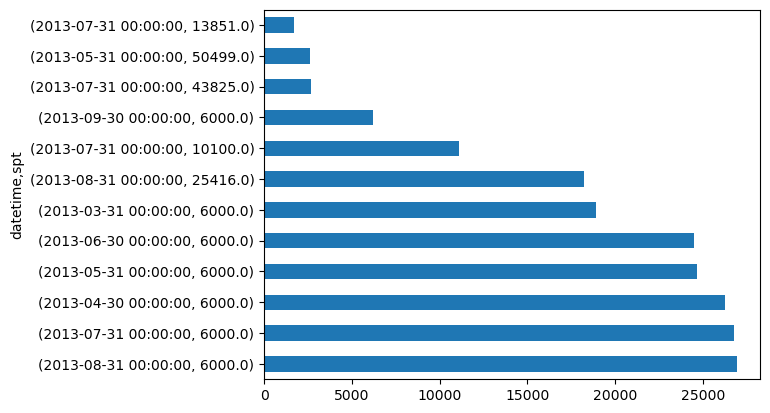

In [23]:
OneMonth.nlargest(12).plot.barh()

Observations from month analysis of intrusion attempts, the months and ports with most intrusions were:
- August 
- July 
- April 

Note: Majority of intrusions occurred on spt 6000

In [24]:
#intrusions by datetime, looking into countries 
OneMonthCountry = df.resample("1M")["country"].value_counts()

<Axes: ylabel='datetime,country'>

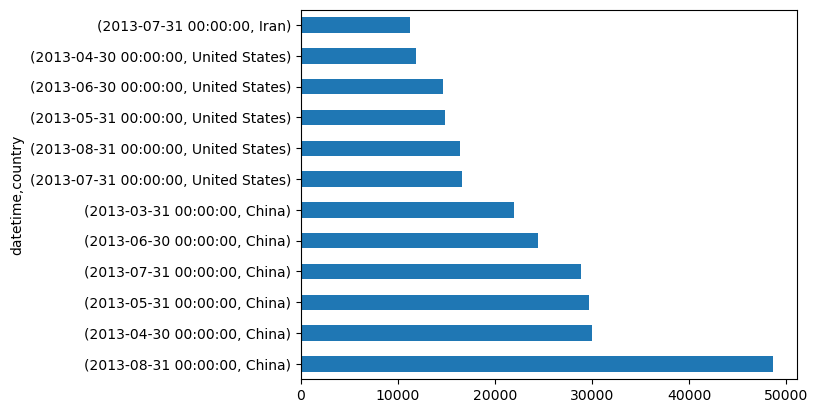

In [25]:
OneMonthCountry.nlargest(12).plot.barh()

Observations: 
- Most intrusion attempts came from Chine in August, April, and May

In [26]:
#looking at hack attempts by locale and time
OneMonthLocale = df.resample("1M")["locale"].value_counts()

<Axes: ylabel='datetime,locale'>

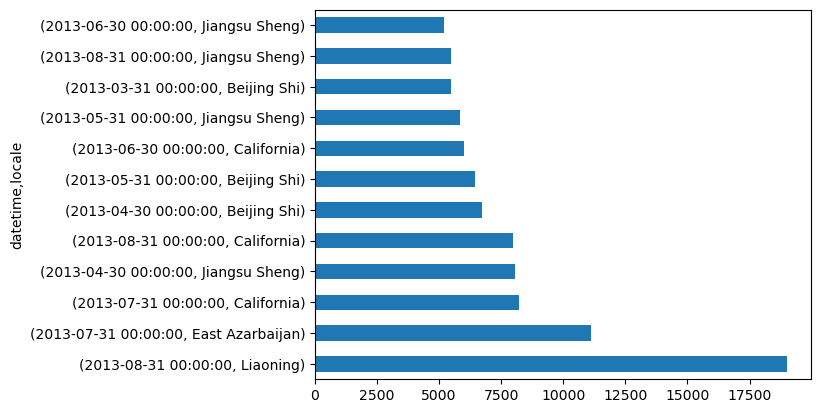

In [27]:
OneMonthLocale.nlargest(12).plot.barh()

Observations: 
- The three locales with most intrusion attempts were Liaoning, East Azarbaijan, and California

In [37]:
test = df['country'].value_counts().head(5).index

In [39]:
top_5_largest = df[df['country'].isin(test)]

<Axes: xlabel='country', ylabel='Count'>

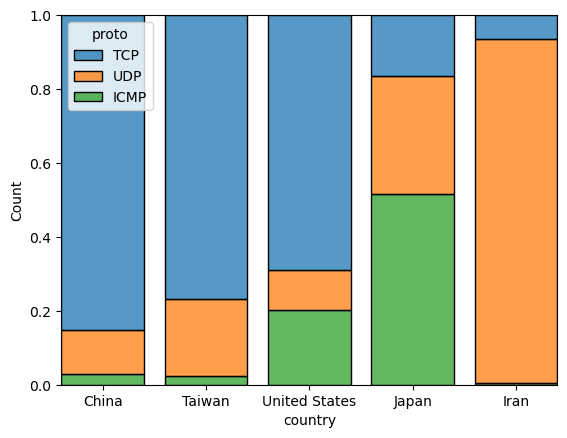

In [43]:
sns.histplot(
    data=top_5_largest,
    x="country", hue="proto",
    multiple="fill", stat="count",
    discrete=True, shrink=.8
)